In [12]:
# Importing the NumPy library as 'np'
# NumPy is used for numerical operations and working with arrays in Python
import numpy as np 

# Importing the pandas library as 'pd'
# pandas is a data manipulation and analysis library, particularly useful for working with structured data like dataframes
import pandas as pd 

# Importing the seaborn library as 'sns'
# seaborn is a data visualization library based on matplotlib, providing a higher-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

# Importing the pyplot interface of matplotlib as 'plt'
# matplotlib.pyplot is used for plotting graphs and charts in Python
import matplotlib.pyplot as plt

# This line is specific to Jupyter notebooks. It ensures that plots and graphs are displayed directly within the notebook
%matplotlib inline

# Importing the warnings module
# This module is used to control the display of warnings in Python
import warnings

# Configuring the warnings filter to ignore all warnings
# This is often done in notebooks to avoid clutter from non-essential warnings, but be aware that it might suppress important alerts
warnings.filterwarnings("ignore")


In [13]:
# loading Dataset
df=pd.read_csv("Battery_RUL.csv")
df

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [14]:
# This line of code will display information about the DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [15]:
# This line of code will display statistical summaries of numerical columns in 'df'
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [16]:
# This line will extract the column names from 'df' and store them in 'numlist'
numlist = df.columns


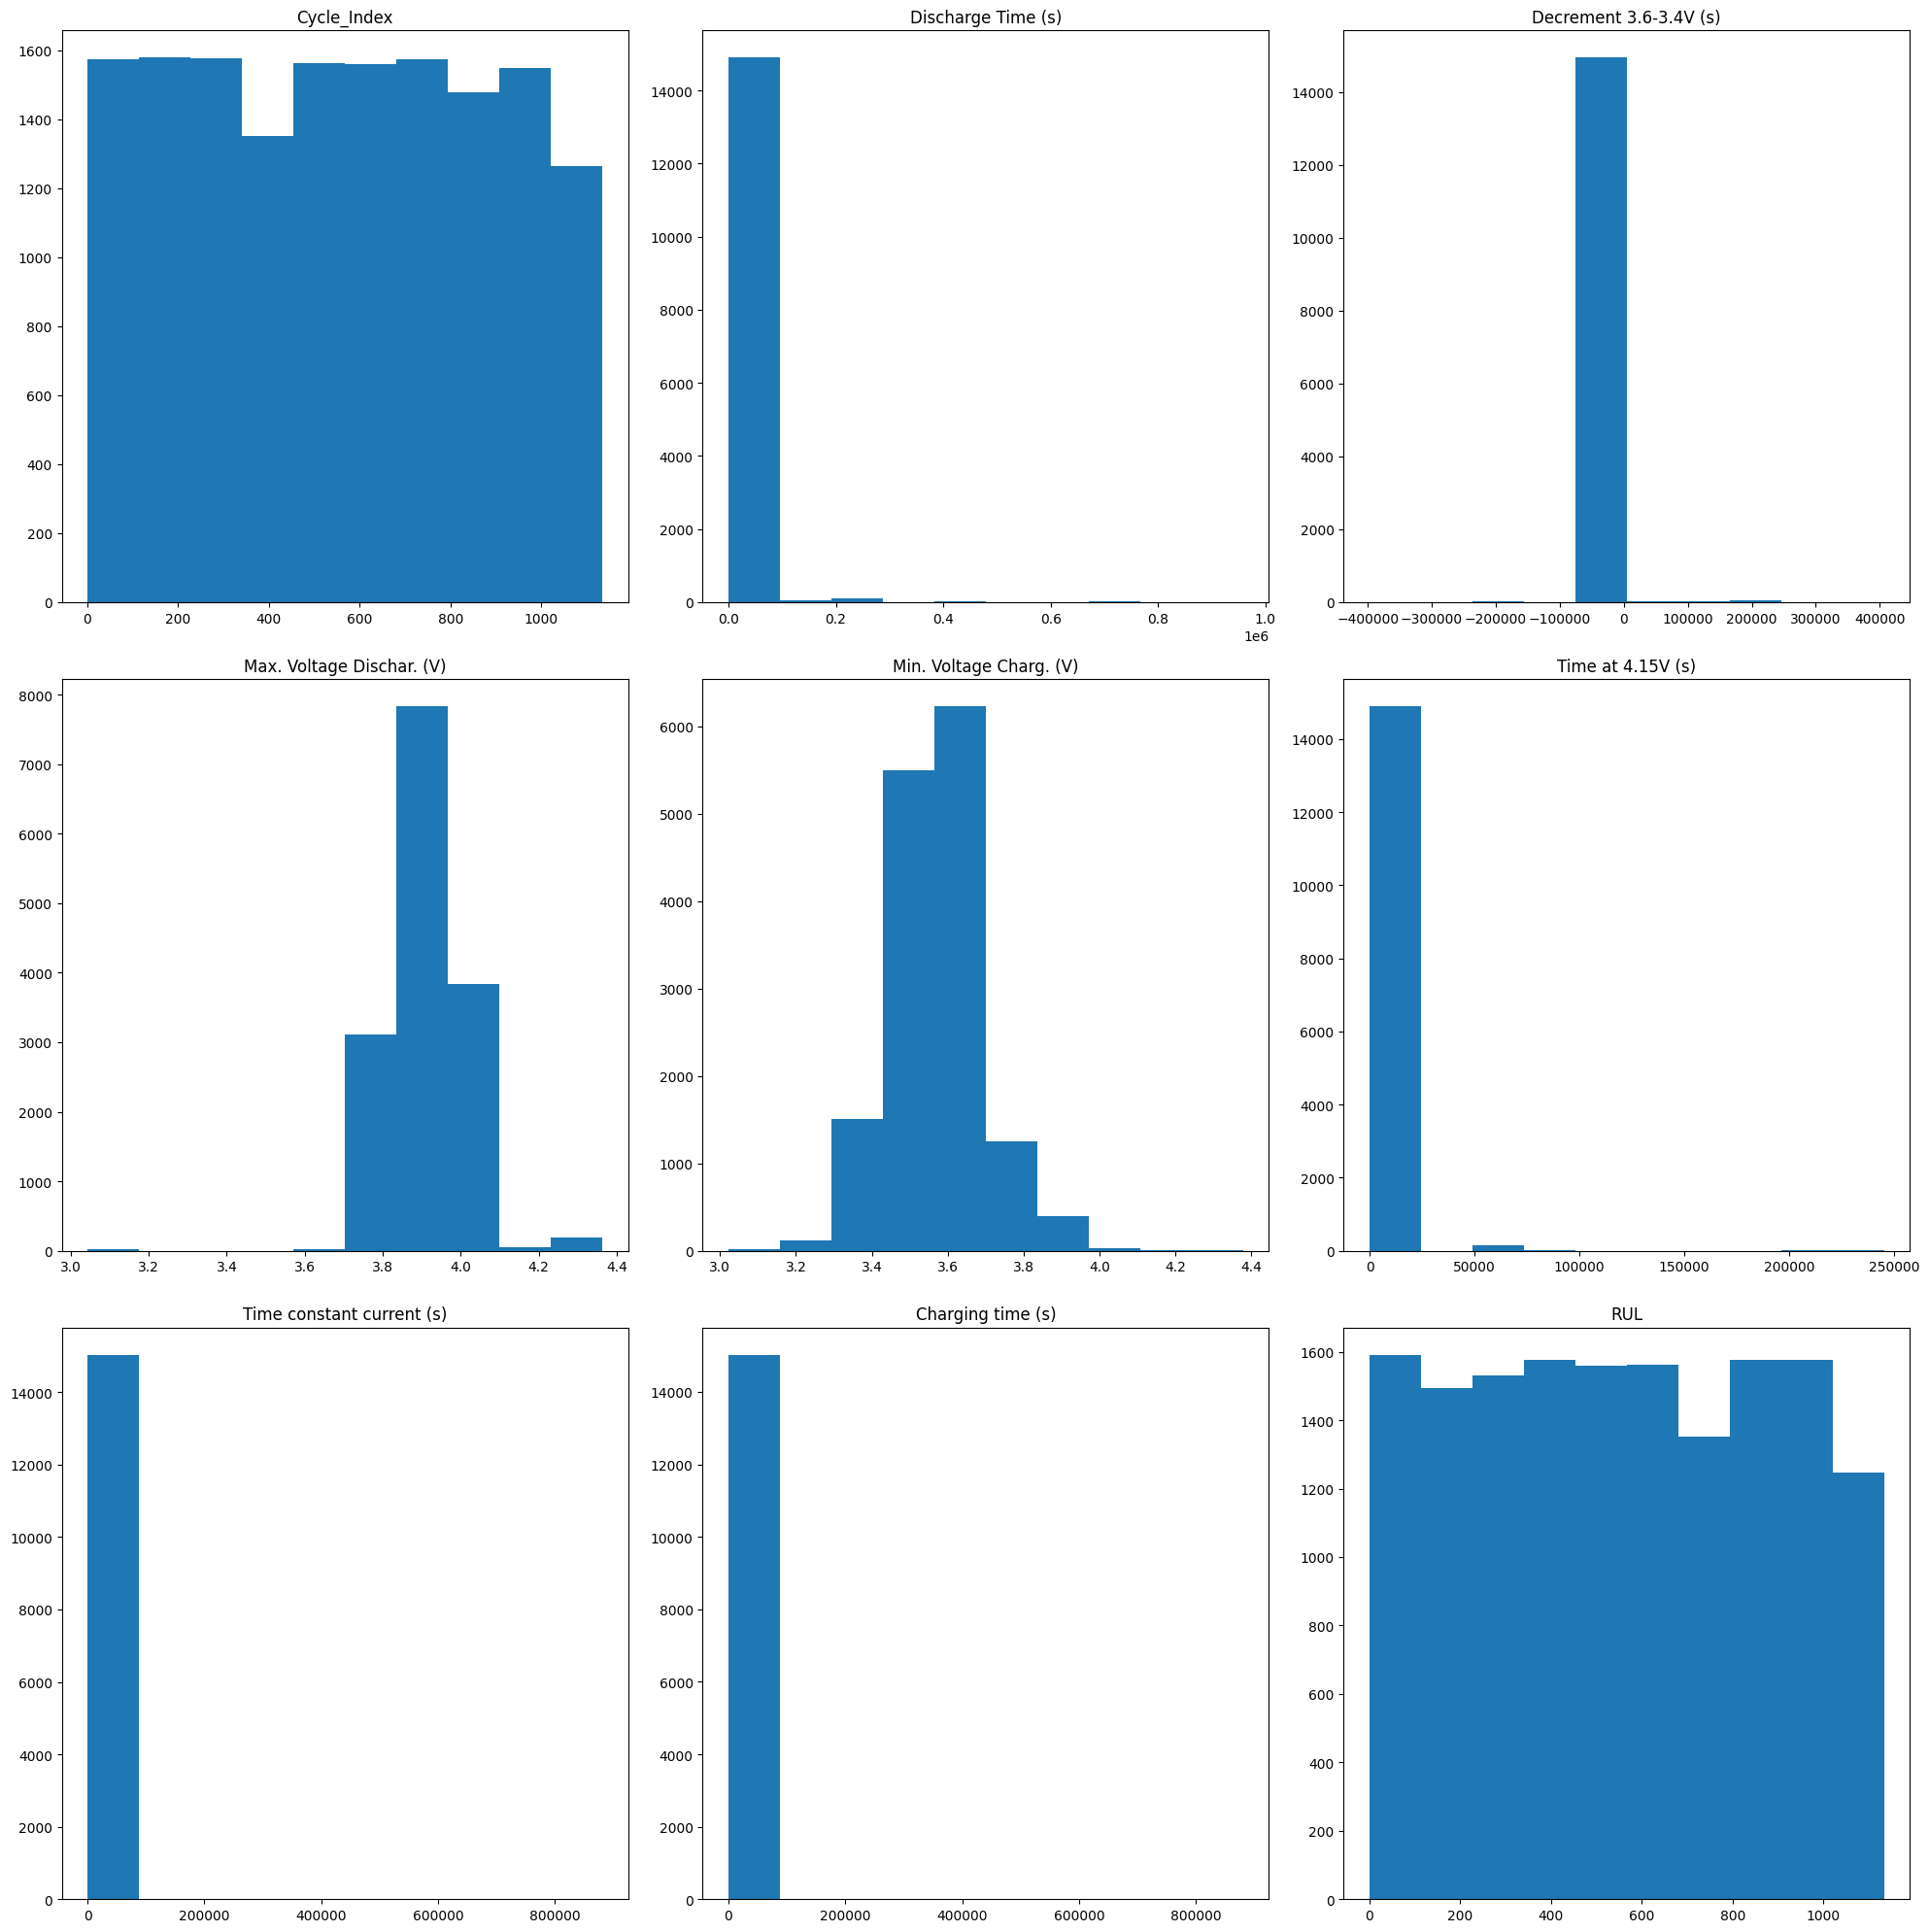

In [17]:
# Create a new figure for plotting with a specified size (20x20 inches)
fig = plt.figure(figsize=(20,20))

# Loop through the columns of the DataFrame. 'numlist' contains the names of these columns.
for i in range(len(numlist)):
    # Create a subplot in a 3x3 grid. 'i + 1' is the position index for the subplot.
    ax = plt.subplot(3, 3, i + 1) 
    
    # Set the background color of the subplot to white.
    ax.set_facecolor('white')  
    
    # Set the title of the subplot to the name of the current column and adjust the font size to 12.
    plt.title(numlist[i], fontsize=12)
    
    # Create a histogram for the current column of the DataFrame.
    # This assumes that the column contains numerical data.
    plt.hist(df[numlist[i]])

# Adjust the layout of the subplots to ensure there is no overlap and everything fits well.
plt.tight_layout()

# Display the figure with all the subplots.
plt.show()




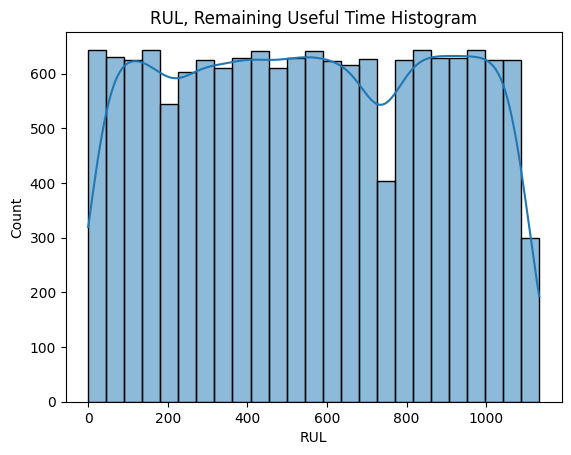

In [18]:
# Setting the title of the plot.
# 'RUL, Remaining Useful Time Histogram' will appear as the title of the histogram.
plt.title('RUL, Remaining Useful Time Histogram')

# Plotting a histogram of the 'RUL' column from the DataFrame 'df'.
# The 'kde=True' argument adds a Kernel Density Estimate (KDE) plot on top of the histogram.
# A KDE plot is a smoothed version of the histogram, often useful for visualizing the distribution of the data.
sns.histplot(df.RUL, kde=True)

# Applying the 'default' style to the plot.
# Matplotlib has various styles that can be used to change the aesthetics of the plots. 'default' is the standard Matplotlib style.
plt.style.use('default')

# Displaying the plot.
# This command shows the plot with the histogram and KDE of the 'RUL' column data.
plt.show()


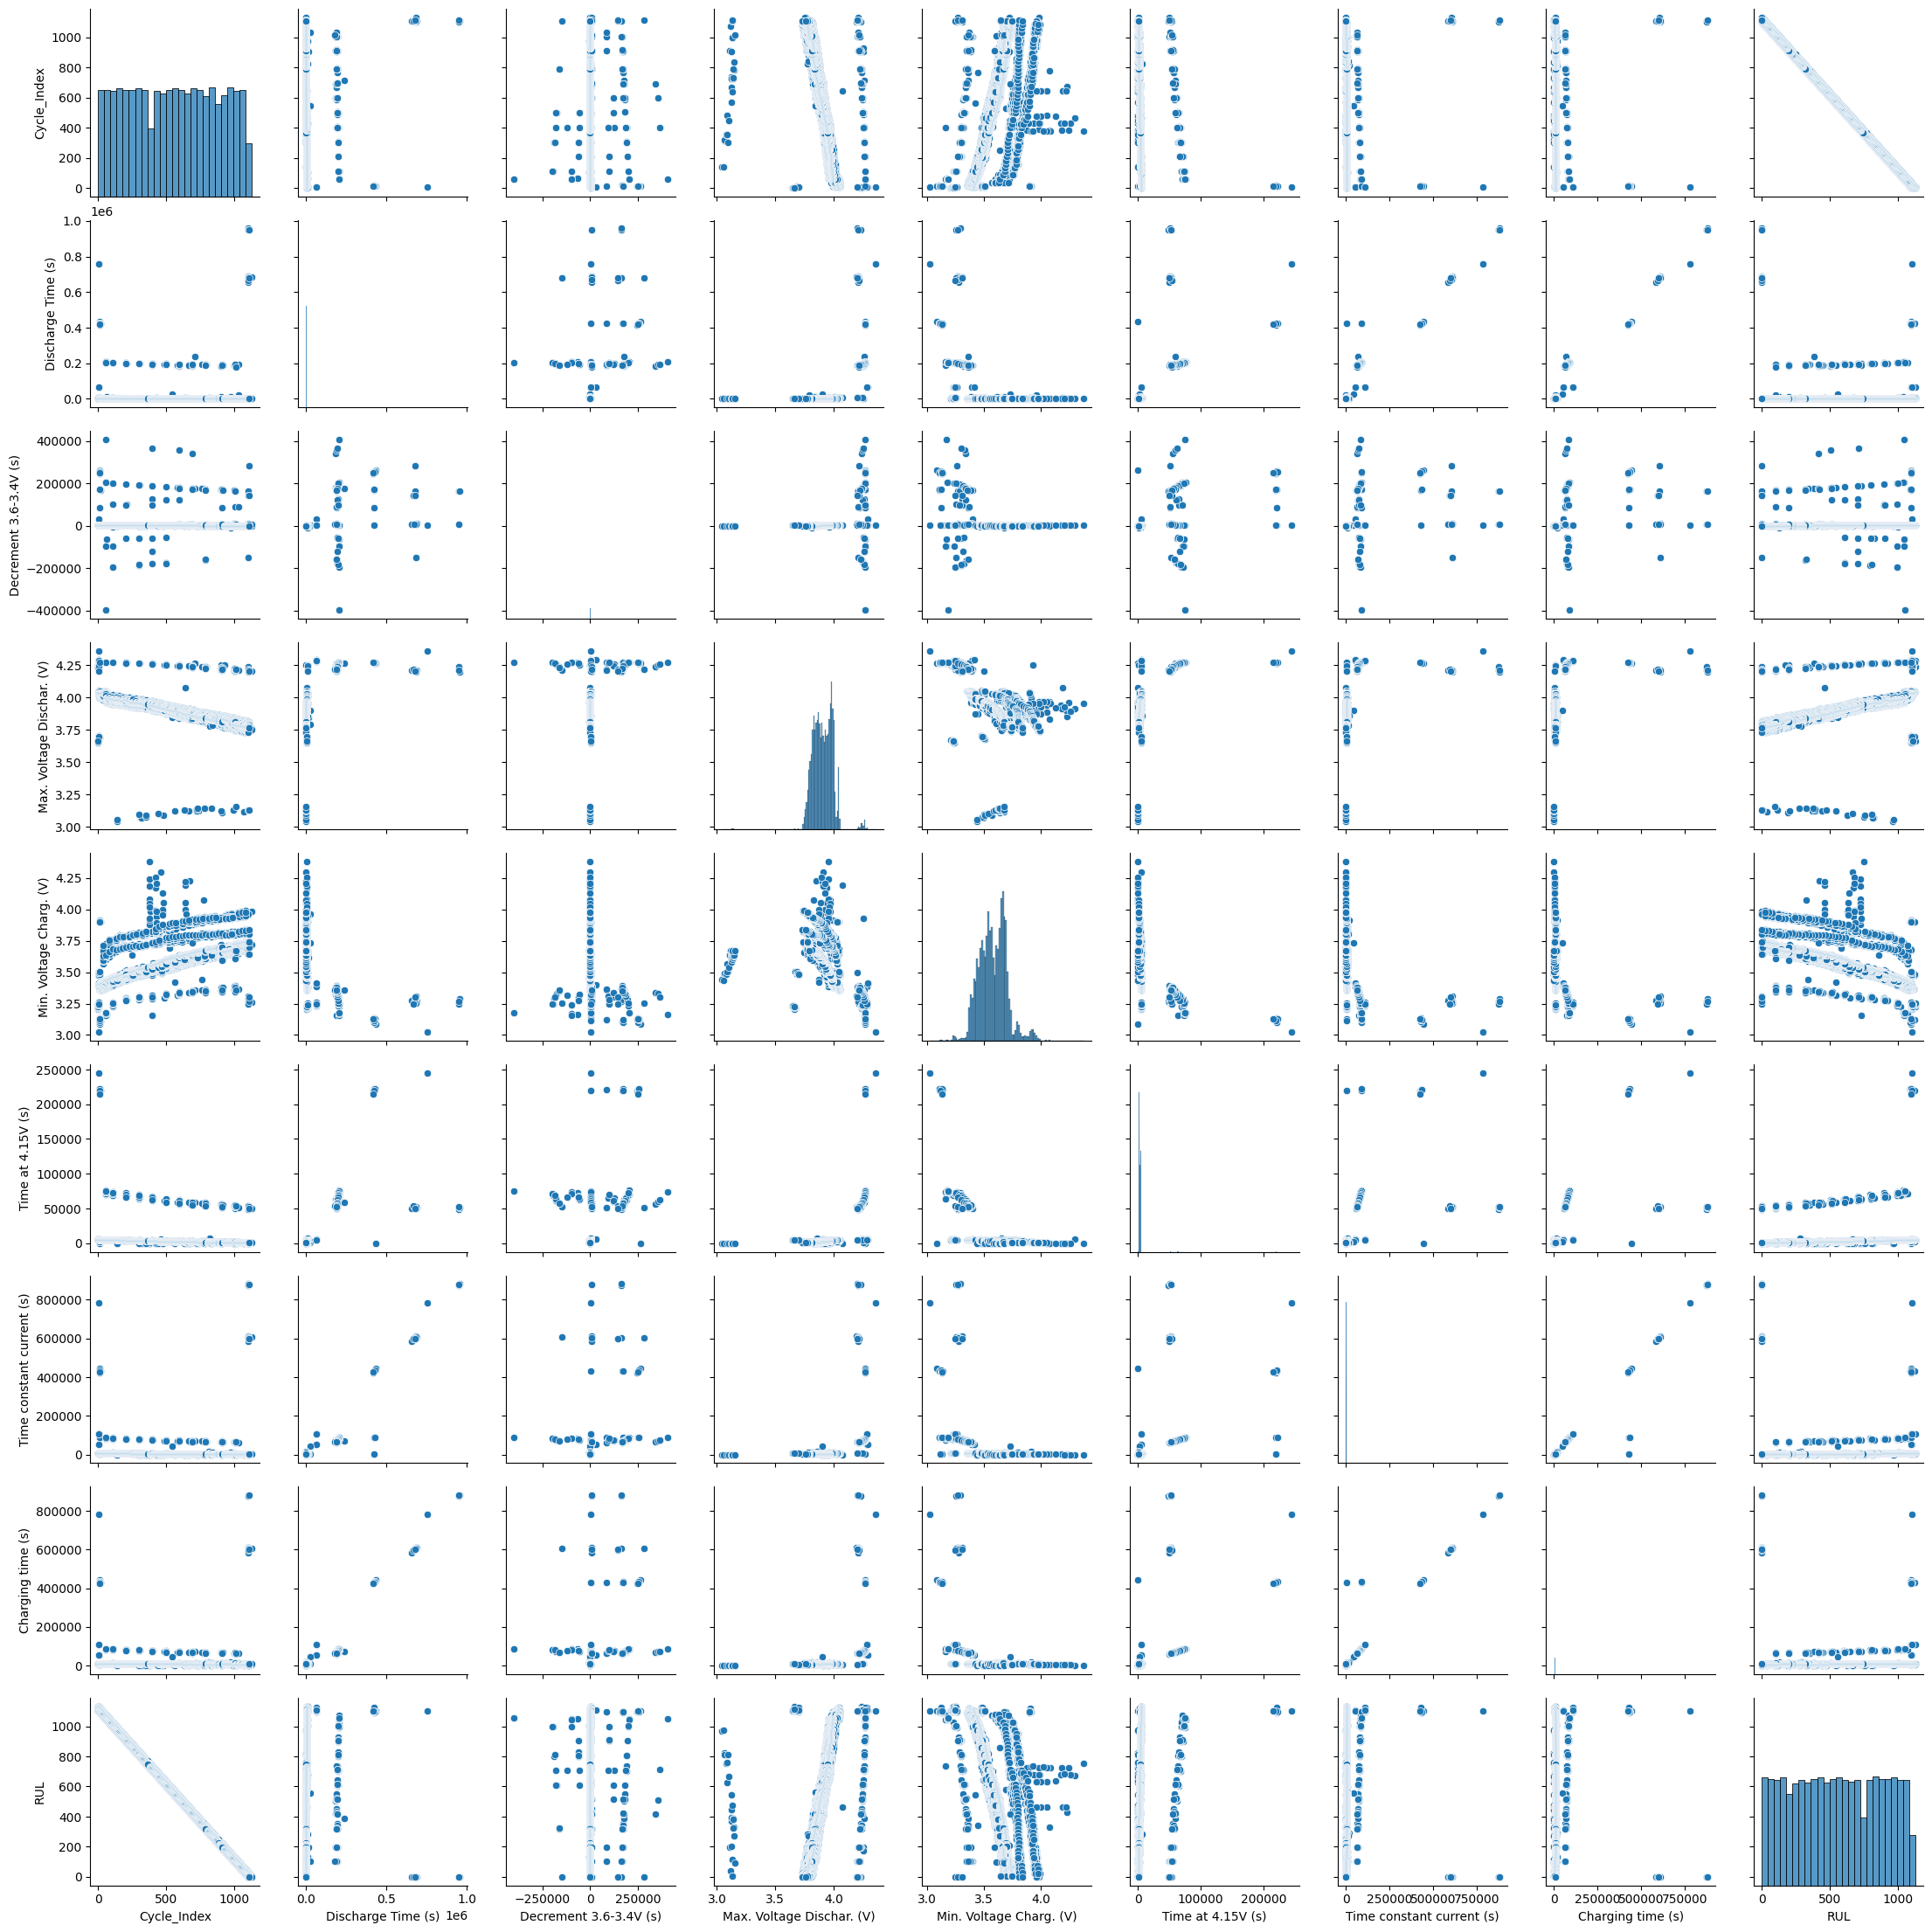

In [19]:
# It also shows histograms or density plots for the distribution of individual variables on the diagonal
sns.pairplot(df)

<Axes: >

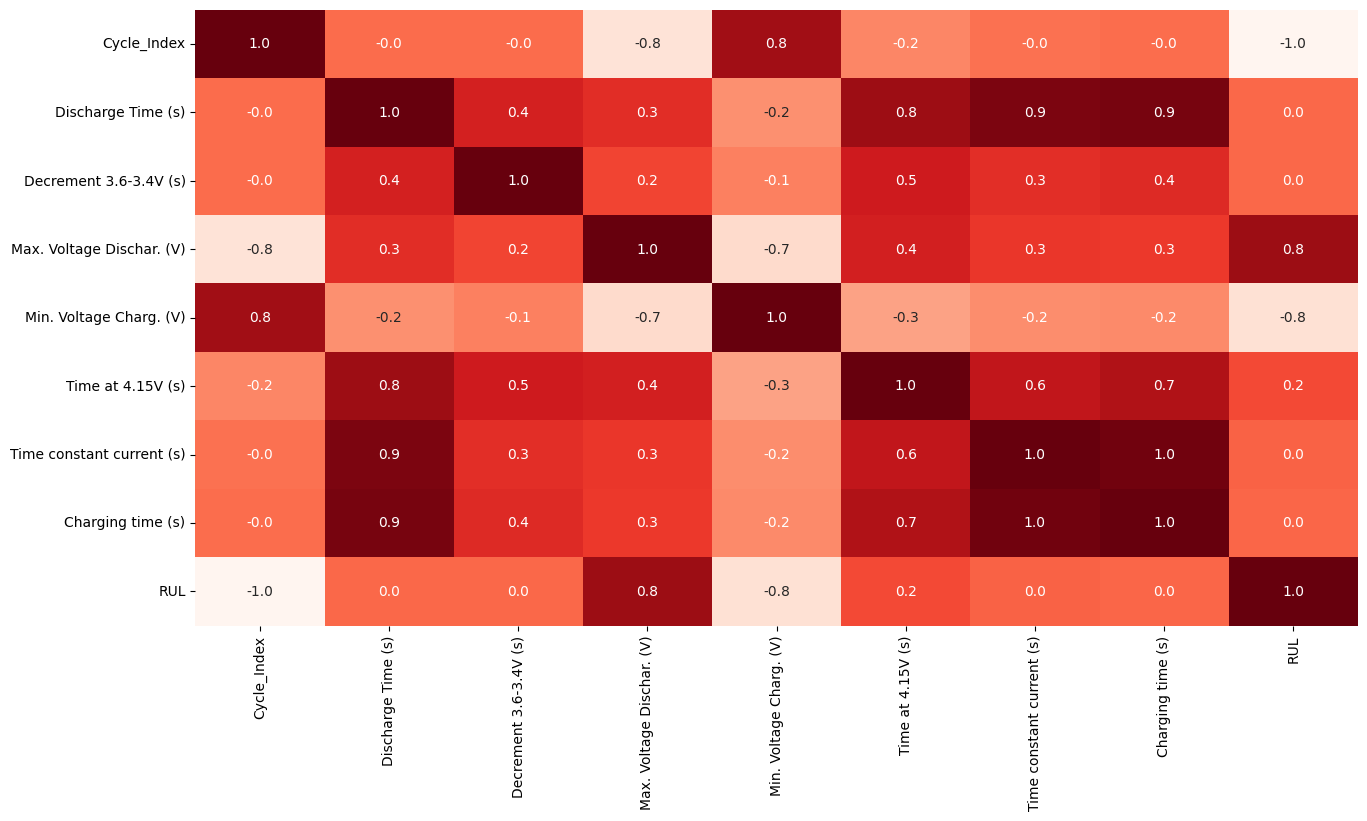

In [20]:
# Create a new figure with a specified size (15x8 inches) for plotting
plt.figure(figsize = (15,8))
# Generate a heatmap for the correlation matrix of the DataFrame 'df'
sns.heatmap(df.corr(),annot=True, cbar=False, cmap='Reds', fmt='.1f')

In [21]:
# 'target' is assigned the values of the 'RUL' column from the DataFrame 'df'
# This column is typically used as the dependent variable in machine learning models
target = df['RUL']

# 'features' is assigned all data from 'df' except the 'RUL' column
# 'drop' function removes the specified column ('RUL' in this case)
# 'axis=1' indicates that a column (not a row) should be dropped
features = df.drop(['RUL'], axis=1)

# The 'shape' attribute of pandas DataFrame or Series gives the dimensionality of the DataFrame/Series
# Here, it returns a tuple representing the number of rows and columns for 'target' and 'features'
target.shape, features.shape



((15064,), (15064, 8))

In [22]:
# drop Cycle_Index
features = features.drop(['Cycle_Index'], axis=1)
features.shape

(15064, 7)

In [23]:
# Importing the StandardScaler class from sklearn.preprocessing module
# StandardScaler is used for standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Creating an instance of the StandardScaler
# This instance will be used to perform the standardization
scaler = StandardScaler()

# Applying the scaler to the features DataFrame
# The fit_transform method computes the mean and standard deviation for scaling
# Then it transforms the features DataFrame, standardizing each feature
features_std = scaler.fit_transform(features)

# Converting the scaled features back into a pandas DataFrame
# This is done for easier handling and manipulation of the data
# The columns parameter ensures that the new DataFrame has the same column names as the original features DataFrame
features_std = pd.DataFrame(features_std, columns = features.columns)

# Displaying the standardized features DataFrame
# Now, each feature has been standardized, meaning they have been scaled to have a mean of 0 and a standard deviation of 1
features_std


,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s)
0,-0.059922,-0.005871,-2.617313,-2.966302,0.185302,0.051431,0.026929
1,0.085308,-0.004473,3.712333,-2.893540,0.190668,0.051710,0.016425
2,0.084859,-0.008431,3.745300,-2.861201,0.190668,0.051710,0.013397
3,0.084610,-0.010603,3.756289,-2.853117,0.189904,0.051710,0.009704
4,1.823662,1.899962,4.195847,-1.454466,0.187601,1.898321,1.765439
...,...,...,...,...,...,...,...
15059,-0.114982,-0.070500,-1.485449,1.326665,-0.311697,-0.160957,-0.128248
15060,-0.114961,-0.070500,-1.485449,1.342834,-0.312493,-0.160960,-0.128570
15061,-0.115022,-0.070511,-1.485449,1.326665,-0.312493,-0.160960,-0.129829
15062,-0.114878,-0.071641,-1.595339,2.110879,-0.353694,-0.171468,-0.091082


In [24]:
# Importing train_test_split and StratifiedKFold from sklearn.model_selection module
# train_test_split is used to split arrays or matrices into random train and test subsets
# StratifiedKFold provides train/test indices to split data into train/test sets in a stratified fashion
from sklearn.model_selection import (train_test_split, StratifiedKFold)

# Splitting the dataset into training and testing sets
# X_train and y_train are the features and target variable for the training set, respectively
# X_test and y_test are the features and target variable for the testing set, respectively
# test_size=0.2 indicates that 20% of the data will be used for the test set
# random_state=2301 is the seed used by the random number generator for reproducibility
X_train, X_test, y_train, y_test = train_test_split(features_std, target, test_size=0.2, random_state=2301)

# Displaying the shapes of the training and testing sets
# X_train.shape and X_test.shape show the number of samples and features in the training and testing feature sets, respectively
# y_train.shape and y_test.shape show the number of samples in the training and testing target sets, respectively
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((12051, 7), (3013, 7), (12051,), (3013,))

In [25]:
# Importing the necessary classes from Scikit-Learn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Creating a Pipeline object
# A Pipeline is a way to streamline a lot of the routine processes in machine learning,
# allowing for cleaner and more understandable code.

# The pipeline consists of steps, each step is a tuple with two elements:
# 1. A string that names the step, here it's 'impute'.
# 2. An instance of a transformer or a model. In this case, it's SimpleImputer.
# SimpleImputer is a transformer that fills in missing values in your data.

# The 'strategy' parameter in SimpleImputer is set to 'mean',
# which means that missing values will be replaced by the mean value of each column.
pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='mean'))])

# Displaying the pipeline object
# This output will show the structure of the pipeline,
# including its steps and the configuration of the SimpleImputer.
pipeline


Pipeline(steps=[('impute', SimpleImputer())])

In [26]:
# Define the function 'prepare_model'
# This function takes an algorithm, training features (X_train), and training target (y_train) as inputs
def prepare_model(algorithm, X_train, y_train): 
    
    # Create a Pipeline object
    # The pipeline consists of two steps: preprocessing and the algorithm itself
    # 'preprocessing' uses the previously defined 'pipeline' which handles data preprocessing like imputation
    # 'algorithm' is a placeholder for any Scikit-Learn compatible estimator (like a classifier or regressor)
    model = Pipeline(steps=[('preprocessing', pipeline), ('algorithm', algorithm)])
    
    # Fit the model to the training data
    # This step will sequentially apply the preprocessing step and then train the algorithm with the preprocessed data
    model.fit(X_train, y_train)
    
    # Return the trained model
    return model


In [27]:
# Importing various regression algorithms from Scikit-Learn
# These algorithms will be used to create different regression models

# RandomForestRegressor: An ensemble method using multiple decision trees
from sklearn.ensemble import RandomForestRegressor

# AdaBoostRegressor: An ensemble method that combines multiple weak learners into a strong learner
from sklearn.ensemble import AdaBoostRegressor

# GradientBoostingRegressor: An ensemble method that optimizes differentiable loss functions
from sklearn.ensemble import GradientBoostingRegressor

# BaggingRegressor: An ensemble method that fits base regressors on random subsets of the dataset
from sklearn.ensemble import BaggingRegressor

# SVR (Support Vector Regression): A type of Support Vector Machine for regression problems
from sklearn.svm import SVR

# DecisionTreeRegressor: A non-parametric method for regression using decision trees
from sklearn.tree import DecisionTreeRegressor

# ExtraTreeRegressor: A variant of decision trees with randomization in the selection of cut-points
from sklearn.tree import ExtraTreeRegressor

# LinearRegression: A linear approach to modeling the relationship between a dependent variable and one or more independent variables
from sklearn.linear_model import LinearRegression

# SGDRegressor: A linear regression model optimized by stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# KNeighborsRegressor: A regression based on k-nearest neighbors
from sklearn.neighbors import KNeighborsRegressor

# Importing time module to measure training time or execution time if needed
import time

# Importing metrics for model evaluation
# mean_squared_error: A metric to measure the average of the squares of the errors
# mean_absolute_error: A metric to measure the average of the absolute errors
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Creating a list of algorithm instances
# This list will be used to iterate over and fit different regression models to the dataset
algorithms = [
    RandomForestRegressor(), 
    AdaBoostRegressor(), 
    GradientBoostingRegressor(), 
    BaggingRegressor(), 
    SVR(), 
    DecisionTreeRegressor(), 
    ExtraTreeRegressor(), 
    LinearRegression(), 
    SGDRegressor(), 
    KNeighborsRegressor()
]


In [28]:
# Creating empty lists to store the names of algorithms, computation times, and error metrics
names = []
times = []
mse = []  # Mean Squared Error
rmse = [] # Root Mean Squared Error

# Iterating through each algorithm in the predefined 'algorithms' list
for algorithm in algorithms:
    # Extracting the name of the algorithm for later reference
    name = type(algorithm).__name__
    names.append(name)

    # Recording the start time of the model training and prediction process
    start_time = time.time()

    # Preparing the model using the predefined 'prepare_model' function
    # This function trains the model with the training data
    model = prepare_model(algorithm, X_train, y_train)

    # Predicting the target values for the test set
    pred = model.predict(X_test)

    # Recording the end time of the process
    end_time = time.time()

    # Calculating and storing the time taken to train and predict
    times.append(end_time - start_time)

    # Calculating the Mean Squared Error between the actual and predicted values
    mse.append(mean_squared_error(y_test, pred))

    # Calculating the Root Mean Squared Error for a more interpretable error metric
    rmse.append(np.sqrt(mean_squared_error(y_test, pred)))

# Printing a header for the results
print('Regression Results in Algorithms') 

# Compiling the collected information into a dictionary
results_dict = {'Algorithm': names, 'MSE': mse, 'RMSE': rmse, 'Time': times}

# Converting the dictionary into a pandas DataFrame for better visualization
# Sorting the DataFrame based on RMSE in ascending order to easily identify the best performing models
pd.DataFrame(results_dict).sort_values(by='RMSE', ascending=True)


Regression Results in Algorithms


,Algorithm,MSE,RMSE,Time
0,RandomForestRegressor,494.824598,22.244653,21.237335
3,BaggingRegressor,638.039936,25.259452,2.124319
6,ExtraTreeRegressor,962.779207,31.028684,0.080052
9,KNeighborsRegressor,984.294086,31.373461,0.050899
5,DecisionTreeRegressor,1261.990126,35.524500,0.245003
2,GradientBoostingRegressor,1959.640182,44.267823,4.773028
1,AdaBoostRegressor,4271.081162,65.353509,1.170140
4,SVR,10637.882904,103.140113,11.511110
7,LinearRegression,22060.500669,148.527777,0.012997
8,SGDRegressor,22416.212829,149.720449,0.028002


In [29]:
# Importing the RandomForestRegressor from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

# Importing the mean_squared_error metric and NumPy for calculations
from sklearn.metrics import mean_squared_error
import numpy as np

# Creating an instance of the RandomForestRegressor
# Setting random_state for reproducibility and n_estimators as the number of trees in the forest
rfr = RandomForestRegressor(random_state=2301, n_estimators=100)

# Training the model on the training dataset (X_train and y_train)
rfr.fit(X_train, y_train)

# Evaluating and printing the score (R^2) on the training set
# The score method returns the coefficient of determination R^2 of the prediction
print(rfr.score(X_train, y_train))

# Evaluating and printing the score (R^2) on the test set
# A higher R^2 value indicates a better fit to the data
print(rfr.score(X_test, y_test))

# Making predictions on the test dataset (X_test)
rfr_pred = rfr.predict(X_test)

# Calculating the Root Mean Squared Error (RMSE) for the predictions
# RMSE is a standard way to measure the error of a model in predicting quantitative data
rfr_rmse = np.sqrt(mean_squared_error(y_test, rfr_pred))

# Printing the RMSE value
# Lower RMSE values indicate better performance
print(rfr_rmse)


0.9992551589548171
0.9946374885266009
23.26577679989827


<Axes: ylabel='RUL'>

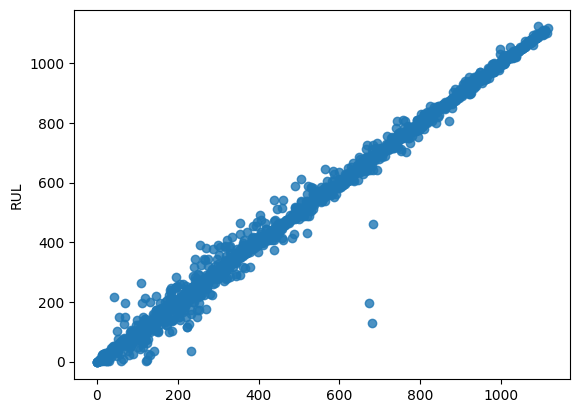

In [30]:
# This plot will include a scatter plot of the points (x=rfr_pred, y=y_test) and a regression line
sns.regplot(x=rfr_pred, y=y_test)

In [31]:
# Use Chatgpt to generate more models
# Create a BaggingRegressor model
bag_reg = BaggingRegressor(random_state=2301, n_estimators=100)

# Fit the model to the training data
bag_reg.fit(X_train, y_train)

# Print the scores on training and test data
print(bag_reg.score(X_train, y_train))  # Training score
print(bag_reg.score(X_test, y_test))    # Test score

# Predict on the test data
bag_reg_pred = bag_reg.predict(X_test)

# Calculate the Root Mean Squared Error
bag_reg_rmse = np.sqrt(mean_squared_error(y_test, bag_reg_pred))
print(bag_reg_rmse)


0.9992628277028843
0.9944337817918263
23.703558749876244


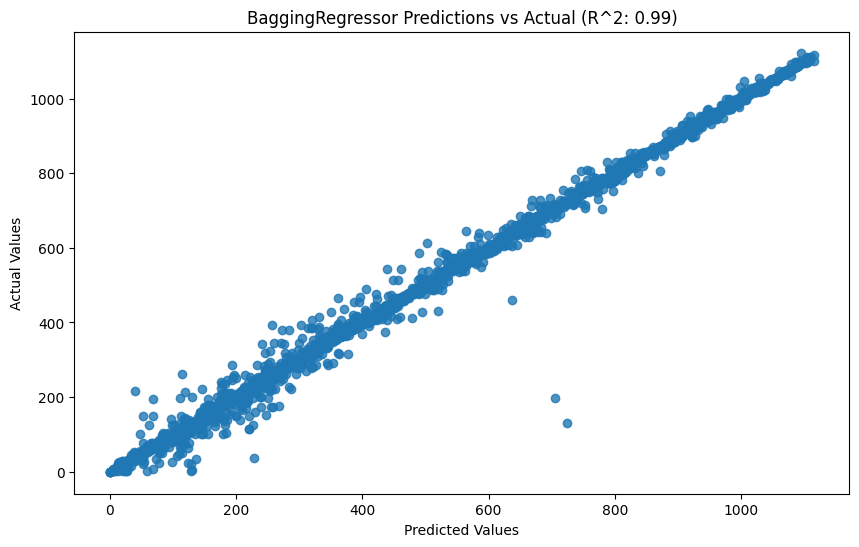

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Create the plot
plt.figure(figsize=(10, 6))

# Plotting the regression plot with Seaborn
sns.regplot(x=bag_reg_pred, y=y_test)

# Calculate R^2 score and add it as a title
r2 = r2_score(y_test, bag_reg_pred)
plt.title(f'BaggingRegressor Predictions vs Actual (R^2: {r2:.2f})')

# Setting labels
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

# Show the plot
plt.show()